***
# EDA demographics
***

In [21]:
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from warnings import filterwarnings
pd.options.display.max_columns = 500

In [70]:
import seaborn as sns
import missingno as msgo

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv("../Dataset/demographics.csv")

In [7]:
df.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,1487,1814,2073,2274,2246,1961,1869,3940,41,8.4,9885,467,253,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,1726,1828,1914,1892,1910,1945,1763,2690,39,21.8,8960,304,256,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,9252,6843,5633,4944,4599,4018,3373,8946,34,87.3,34310,2772,1782,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,1296,1336,1451,1557,1659,1560,1326,3176,43,25.5,7122,270,349,445,632,690,1417,1060,1237,589,433,70772,84402


## Descriptivos

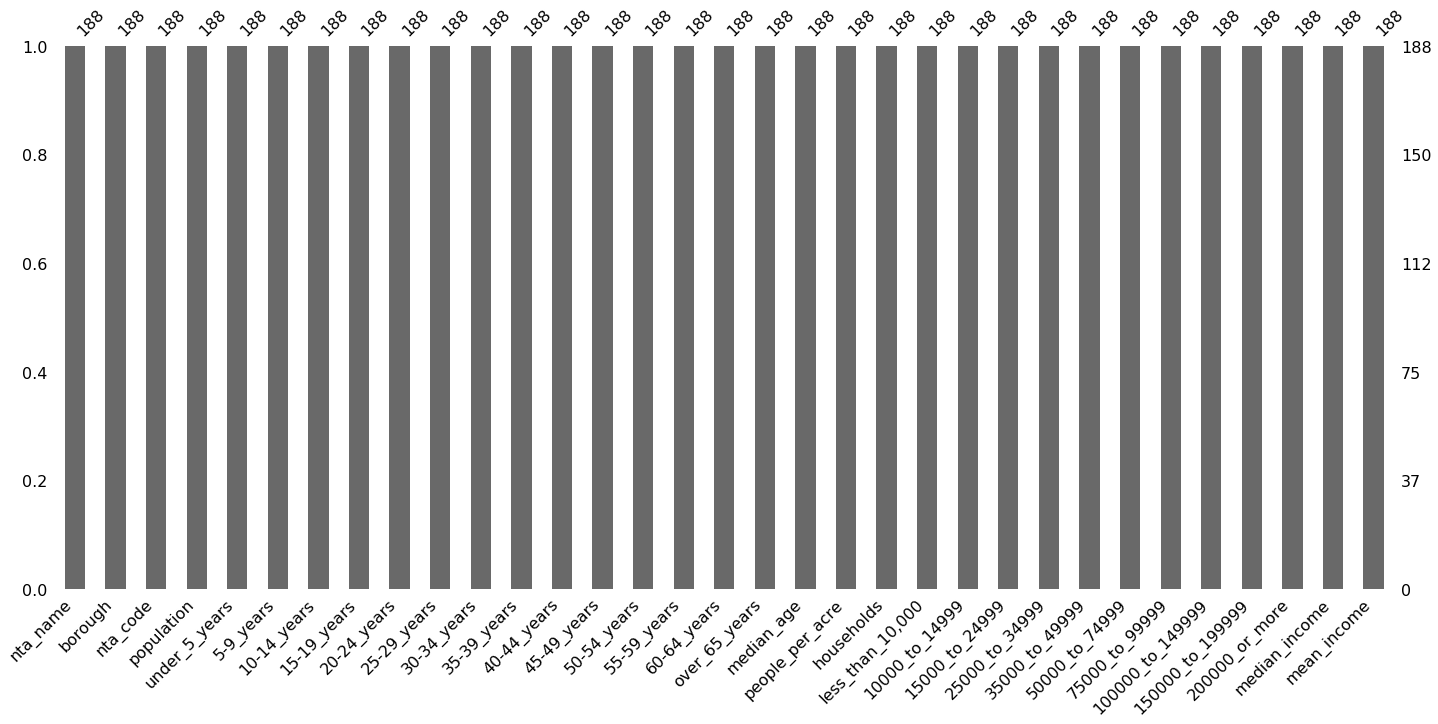

In [11]:
msgo.bar(df)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,188.0,43397.175532,21288.062949,13354.0,27237.00,37897.00,54244.750,132378.0
under_5_years,188.0,2752.127660,1695.809470,506.0,1490.50,2386.00,3579.250,14703.0
5-9_years,188.0,2515.478723,1496.808314,408.0,1443.50,2228.50,3242.750,11971.0
10-14_years,188.0,2489.159574,1459.440306,326.0,1437.75,2197.50,3263.750,10024.0
15-19_years,188.0,2842.632979,1574.371410,449.0,1619.00,2568.00,3717.250,9094.0
20-24_years,188.0,3404.617021,1886.482082,798.0,1929.50,2956.00,4527.000,10046.0
25-29_years,188.0,3872.106383,2462.683806,736.0,2089.25,3081.50,5252.750,11971.0
30-34_years,188.0,3512.468085,2113.358863,742.0,1928.00,2893.00,4611.000,11292.0
35-39_years,188.0,3116.265957,1704.685137,689.0,1835.75,2555.50,4034.500,10406.0
40-44_years,188.0,3007.898936,1531.520696,743.0,1867.50,2520.00,3778.500,10004.0


 Distribuciones por familias de variables 

In [16]:
population_age = ['population', 'under_5_years',
       '5-9_years', '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years',
       'median_age', 'people_per_acre', 'households']
population_incomes =[ 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income']

### Population ages

In [17]:
# distribución de datos

In [27]:
df.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,1487,1814,2073,2274,2246,1961,1869,3940,41,8.4,9885,467,253,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,1726,1828,1914,1892,1910,1945,1763,2690,39,21.8,8960,304,256,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,9252,6843,5633,4944,4599,4018,3373,8946,34,87.3,34310,2772,1782,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,1296,1336,1451,1557,1659,1560,1326,3176,43,25.5,7122,270,349,445,632,690,1417,1060,1237,589,433,70772,84402


#Agrupación por barrio - Promedio, máximo, mínimo

Promedio

- Al considerar los datos por "barrio" se puede observar 3 grupos grupos de poblaciones promedio - Brooklyn/Manhattan, Bronx/Queens y Staten Island.

In [41]:
df.groupby("borough").agg("mean").T

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
population,38114.194444,50070.360,56572.285714,39826.535714,26040.555556
under_5_years,2860.972222,3541.160,2734.107143,2365.232143,1574.388889
5-9_years,2737.166667,3185.700,2190.035714,2209.839286,1667.500000
10-14_years,2751.333333,3129.880,2079.500000,2203.517857,1710.944444
15-19_years,3176.222222,3412.460,2765.750000,2483.535714,1829.388889
20-24_years,3071.638889,3914.660,5051.785714,2872.285714,1747.666667
25-29_years,2884.138889,4453.820,6662.571429,3301.714286,1666.000000
30-34_years,2675.416667,4054.060,5510.392857,3163.857143,1658.833333
35-39_years,2494.777778,3550.220,4383.678571,2934.285714,1748.444444
40-44_years,2628.694444,3275.720,3964.964286,2890.875000,1897.666667


In [51]:
df.groupby(["borough"]).agg("sum").T

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
population,1372111.0,2503518.0,1584024.0,2230286.0,468730.0
under_5_years,102995.0,177058.0,76555.0,132453.0,28339.0
5-9_years,98538.0,159285.0,61321.0,123751.0,30015.0
10-14_years,99048.0,156494.0,58226.0,123397.0,30797.0
15-19_years,114344.0,170623.0,77441.0,139078.0,32929.0
20-24_years,110579.0,195733.0,141450.0,160848.0,31458.0
25-29_years,103829.0,222691.0,186552.0,184896.0,29988.0
30-34_years,96315.0,202703.0,154291.0,177176.0,29859.0
35-39_years,89812.0,177511.0,122743.0,164320.0,31472.0
40-44_years,94633.0,163786.0,111019.0,161889.0,34158.0


In [52]:
df.groupby(["borough"]).agg("max").T

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
nta_name,Woodlawn-Wakefield,Windsor Terrace,Yorkville,Woodside,Westerleigh
nta_code,BX75,BK96,MN50,QN76,SI54
population,62284,106357,132378,108152,40720
under_5_years,5160,14703,7197,6745,2491
5-9_years,4703,11971,5482,5855,2523
10-14_years,4657,10024,4817,5701,2631
15-19_years,5267,9094,5888,6302,2732
20-24_years,4944,8844,10046,7846,2527
25-29_years,4663,9779,11971,11586,2507
30-34_years,4332,9258,11292,9328,2537


Histograma por Variables

In [25]:
for i in population_age: 
    x =df[i]
    fig = go.Figure()
    fig.add_trace(go.Histogram(histfunc="count", x=x, name="count"))
    fig.update_layout(title=i)
    fig.show()

Histograma por variable en función del borough

In [38]:
for i in population_age: 
    fig = go.Figure()
    for borough in df["borough"].unique():
        x = df[df["borough"] ==borough][i]
        
        fig.add_trace(go.Histogram(histfunc="count", x=x, name=borough))
        # Overlay both histograms
    fig.update_layout(barmode='overlay')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)    
    fig.update_layout(title=i)
    fig.show()

In [26]:
for i in population_incomes: 
    x =df[i]
    fig = go.Figure()
    fig.add_trace(go.Histogram(histfunc="count", x=x, name="count"))
    fig.update_layout(title=i)
    fig.show()

In [39]:
for i in population_incomes: 
    fig = go.Figure()
    for borough in df["borough"].unique():
        x = df[df["borough"] ==borough][i]
        
        fig.add_trace(go.Histogram(histfunc="count", x=x, name=borough))
        # Overlay both histograms
    fig.update_layout(barmode='overlay')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)    
    fig.update_layout(title=i)
    fig.show()

In [53]:
plotly_colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                         'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                         'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                         'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                         'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

def plot_targetCat_boxplot(dfc, target,Categorical):
    """
    Plot boxplot of input target by cluster
    :param dfc: (pandas.DataFrame) matrix with targets, pcas and cluster labels
    :param target: (str) name of the target to plot
    """

    # Asign Colors by Cluster
    levels = dfc[Categorical].unique()
    #colors = dict(zip(clusters, plotly_colors))
        # Set Figure
    fig = go.Figure(

            # Figure Traces
            data = [go.Box(
                x=dfc[dfc[Categorical] == level][target],
                name=level,jitter = 0.3,  pointpos = -1.8,
        boxpoints = 'all', #marker=dict(color=colors[cluster]),
            ) for level in levels],

            # Figure Layout
            layout = go.Layout(
                xaxis=dict(title=target, tickformat='.2f'),
                
                annotations=[dict(
                    text='Distribution of {} by Category in {}'.format(target,Categorical),
                    font=dict(size=24),
                    showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.15, yref='paper', yanchor='top'
                )]
            )
        )

    # Display Figure
    iplot(fig)

In [58]:
for varl in population_age:
    plot_targetCat_boxplot(df,varl,"borough")

In [59]:
for varl in population_incomes:
    plot_targetCat_boxplot(df,varl,"borough")

# Matriz de correlación

In [60]:
def Corr_matrix_plot(dataset,Title="Matriz de correlación"):
    corr_mat = dataset.corr()
    corr_mat = corr_mat.applymap(lambda x: round(x,2))

    # Plot Correlation Matrix
    iplot(go.Figure(

        # Trace
        data = [go.Heatmap(
            z=corr_mat.values,
            x=corr_mat.columns,
            y=corr_mat.index,
            colorbar=dict(title='Corr'),
            colorscale='Picnic',
            zmin=-1, zmax=1
        )],

        # Layout
        layout = go.Layout(
            # Title
            annotations=[dict(
                text=Title,
                font=dict(size=24),
                showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.2, yref='paper', yanchor='top'
            )] + [dict(
                text=str(corr_mat.loc[y, x]),
                font=dict(size=12),
                showarrow=False, x=x, y=y,
            ) for x in corr_mat.columns for y in corr_mat.index],
            xaxis=dict(tickangle=-35),
            margin=dict(l=250, b=180),
            height=620
        )

    ))

In [61]:
Corr_matrix_plot(df[population_age],"Matriz de correlación de variables de population age")

In [62]:
Corr_matrix_plot(df[population_incomes],"Matriz de correlación de variables de population income")

In [63]:
Corr_matrix_plot(df,"Matriz de correlación de variables de population age")

### Primeros clusters

In [67]:
def deal_with_nans(x, thresh=0.7):
    """
    Deal with nan data
    First drop columns for which there isn't enoug data.
    Then fill missing values using median for continuous features and mode for categorical
    Finally drop columns with no variability
    :param x: (pandas.DataFrame) features dataframe
    :param thresh: (float) features with missing values below the thresh are discarted
    :return: (pandas.DataFrame) cleaned dataframe
    """

    # Drop rows with no data
    dff = x.dropna(how='all')

    # Drops columns with not enough data
    dff.dropna(thresh=thresh * len(dff), axis=1, inplace=True)

    # Identify continuous features
    float_vars = [y for y in dff.columns if 'float' in str(dff[y].dtype)]

    # Fill missing values
    for feat in dff.columns:
        if feat in float_vars:
            # Fill continuous features with median
            dff[feat] = dff[feat].fillna(dff[feat].median())
        else:
            # Fill categorical features with mode
            dff[feat] = dff[feat].fillna(dff[feat].mode()[0])

    # Drops columns with no variability
    dff = dff[[y for y in dff.columns if len(dff[y].unique()) > 1]]

    # Returns dataframe with no NaNs
    return dff


def clean_outliers(x, alpha=0.05):
    """
    Put all outliers on the confidence interval limit.
    :param x: (pandas.DataFrame) matrix of features
    :param alpha: (float) significance, 5% by default
    :return: (pandas.DataFrame) matrix with no outliers
    """

    # Cleaning Initialization
    x_c = x.copy()

    # Identification of categorical variables
    cont_vars = [x for x in x_c.columns if 'float' in str(x_c[x].dtype)]

    # If no continuous variables
    if len(cont_vars) == 0:
        return x_c

    # Cleaning
    for var in cont_vars:
        ll = x_c[var].quantile(alpha)
        ul = x_c[var].quantile(1-alpha)
        x_c[var] = [ll if x < ll else (ul if x > ul else x) for x in x_c[var]]

    # Return
    return x_c


def standarize(x):
    """
    Normalize data
    :param x: (pandas.DataFrame) matrix to normalize
    :return: (pandas.DataFrame) normalized matrix
    """

    # Outliers Treatment
    x_oc = clean_outliers(x)

    scale = StandardScaler()
    return pd.DataFrame(scale.fit_transform(x_oc), columns=x.columns, index=x_oc.index)


def get_principal_componets(x, n_pca=None):
    """
    Obtain the principal components from a set of continuous features.
    If the number of components is not especified, the model find the minimum number
    required to explain 90% of variance.
    :param x: (pandas.DataFrame) matrix from which the components are extracted
    :param n_pca: number of components
    :return: (pandas.DataFrame) matrix of components
    """

    # Standarization
    x_std = standarize(x)

    # Identify minimum number of components to explain 90% of the variability
    if n_pca is None:
        pca = PCA(random_state=1234)
        pca.fit(x_std)
        loadings = [round(y, 2) for y in pca.explained_variance_ratio_]
        cumsumload = list(np.cumsum(loadings))
        ncomps = [(y + 1, cumsumload[y]) for y in range(len(cumsumload))]
        n_pca = [y for y in ncomps if y[1] >= 0.9][0][0]

    # Calculate and return pcs
    pca = PCA(n_components=n_pca, random_state=1234)
    dp = pd.DataFrame(
        pca.fit_transform(x_std),
        columns=['PCA '+str(i+1) for i in range(n_pca)],
        index=x.index
    )
    return dp


def clusterize(x, n_clusters=3, pca=False):
    """
    Performs KMeans clusterization.
    If the number of components is not especified, the model finds
    the number of clusters that maximize the silhouette score
    :param x: (pandas.DataFrame) matrix of continuos features used for clusterization
    :param n_clusters: (int) number of clusters
    :param pca: (boolean) True if PCA must be applied before clusterization
    :return: (pandas.DataFrame) matrix of clusters
    """
    # Cleaning
    x_c = deal_with_nans(x)

    n_features = len(x.columns)
    if n_features == 1:
        # Binning
        x_std = np.array(x_c).reshape(-1, 1)
    else:
        # PCA
        x_std = get_principal_componets(x_c) if pca else standarize(x_c)

    # Identify the number of clusters that maximize the silhouette score
    if n_clusters is None:
        cluster_span = [y for y in range(2, 7)]
        ss = []
        for i in cluster_span:
            model = KMeans(n_clusters=i, random_state=1234)
            model = model.fit(x_std)
            mm = pd.DataFrame(model.fit_predict(x_std), columns=['labels'])
            ss.append(round(silhouette_score(x_std, mm['labels']), 3))

        ind = ss.index(max(ss))
        n_clusters = cluster_span[ind]

    # Clusterization
    model = KMeans(n_clusters=n_clusters, random_state=1234)
    model = model.fit(x_std)
    dc = pd.DataFrame(model.fit_predict(x_std), columns=['cluster'], index=x_c.index)

    # If there is a target, the clusters are sorted in accordance to that target
    if 'target' in x_c.columns:
        dc = pd.concat([x_c, dc], axis=1)
        # dc['target'] = x_c['target']
        ds = dc.groupby('cluster').mean()
        ds.sort_values('target', ascending=False, inplace=True)
        cluster_dict = dict(zip(ds.index, ['C' + str(i + 1) for i in range(n_clusters)]))
        dc.cluster = [cluster_dict[y] for y in dc.cluster]
        dc.sort_values('cluster', ascending=True, inplace=True)

    else:
        dc.cluster = dc.cluster + 1
        dc.cluster = ['C'+str(c) for c in dc.cluster]

    # Return
    return dc

In [68]:
def plot_clusters(dw, cluster_targets, title='Coordinates'):
    dataset = dw.copy()

    dataset = dataset[cluster_targets]
    dataset = deal_with_nans(dataset)
    dataset['cluster'] = clusterize(dataset, pca=True)

    # Soer Clusters by label
    sort_label = cluster_targets[0]
    dsort = dataset.groupby('cluster').median()
    dsort.sort_values(sort_label, ascending=False, inplace=True)
    cluster_translator = dict(zip(dsort.index, ['C3', 'C2', 'C1']))

    dataset['cluster'] = [cluster_translator[x] for x in dataset.cluster]
    dataset.sort_values('cluster', ascending=True, inplace=True)

    dfc = dataset.copy()

    # Identify targets
    targets = [x for x in dfc.columns if 'PCA ' not in x and x != 'cluster']
    x_t = dfc[targets]
    y = dfc['cluster']

    # Get Ordered Targets
    ordered_targets = cluster_targets

    # Asign Colors by Cluster
    clusters = dfc.cluster.unique().tolist()
    colors = {
        'C3': '#2ca02c',
        'C2': '#ff7f0e',
        'C1': '#d62728'
    }

    # Set Figure
    fig = go.Figure(

        # Figure Traces
        data=[go.Parcoords(
            line=dict(
                color=[clusters.index(x) for x in dfc['cluster']],
                colorscale=[[clusters.index(x)/2, colors[x]] for x in clusters],
            ),
            dimensions= [dict(
                label='Cluster',
                values=[int(x.replace('C', '')) for x in dfc['cluster']],
                tickvals=[int(x.replace('C', '')) for x in clusters],
                ticktext=clusters
            )] + [dict(
                label=y,
                values=dfc[y],
                tickformat='.2f'
            ) for y in ordered_targets]
        )],

        # Figure Layout
        layout=go.Layout(
            annotations=[dict(
                text=title,
                font=dict(size=24),
                showarrow=False, x=0.0, xref='paper', xanchor='left', y=1.30, yref='paper', yanchor='top'
            )],
            margin=dict(b=50)
        )
    )

    # Display Figure
    iplot(fig)

In [87]:
#targets = ['PESOAVG_M_S25', #'PESOAVG_H_S25',
#           'POLLOSAA_S60', 'HUEVOINCAA_S60', 'HAA_S60', 'MORT_H_S60']
targets =  df.select_dtypes(include=['int64','float64']).columns.unique()
plot_clusters(df, targets, '')

C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\jreyes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')